In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Data link
kaggle: https://www.kaggle.com/shubhammehta21/movie-lens-small-latest-dataset

In [61]:
rating_data = pd.read_csv("drive/My Drive/colab notebooks/ratings.csv")
movie_data = pd.read_csv("drive/My Drive/colab notebooks/movies.csv")

In [62]:
rating_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [63]:
movie_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [64]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [65]:
rating_data['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [66]:
rating_data['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

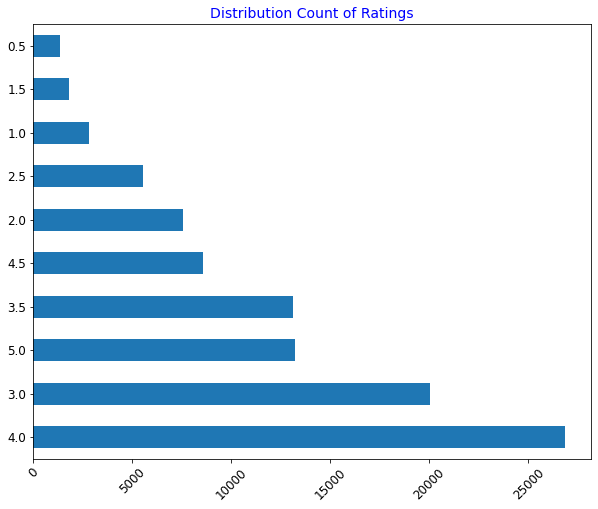

In [67]:
plt.figure(figsize = (10,8))
rating_data['rating'].value_counts().plot(kind = 'barh')
plt.title("Distribution Count of Ratings", fontsize = 14, color = 'blue')
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

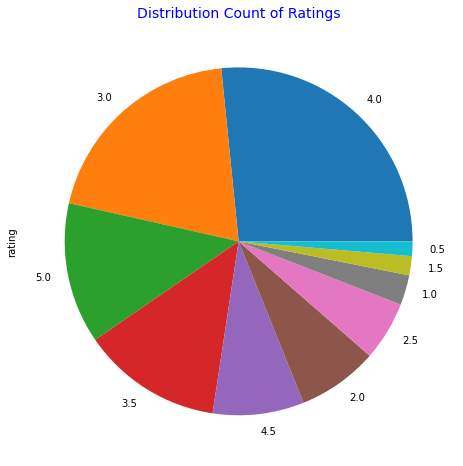

In [68]:
plt.figure(figsize = (10,8))
rating_data['rating'].value_counts().plot(kind = 'pie')
plt.title("Distribution Count of Ratings", fontsize = 14, color = 'blue')
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [69]:
rating_data = rating_data.drop("timestamp", axis=1)

In [70]:
rating_data

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [71]:
# find out all users
len(rating_data['userId'].unique())

610

In [72]:
len(rating_data['movieId'].unique())

9724

In [73]:
#check missing values
rating_data.isna().sum().sum()

0

## Users vs Movies 
- users = rows
- movies = columns.
- 610 users and 9724 columns. 
 - so a matrix of size 610*9724.

 # User-based similarity

In [74]:
user_movies_data = rating_data.pivot(index = 'userId',
                                     columns = 'movieId',
                                     values = 'rating').reset_index(drop = True)

In [75]:
user_movies_data

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.5,NaN,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,4.5,NaN,NaN,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,2.0,NaN,3.5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.5,3.5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
user_movies_data.fillna(0, inplace = True)

In [77]:
user_movies_data

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.5,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,4.5,0.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,2.0,0.0,3.5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.5,3.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
user_movies_data.iloc[0:5, 0:15]

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Recommendation Engine
- Association Rule (Bread and Butter example on e-commerce)
 - using apriori algorithm (support, lift and confidence)
- Collaborative Filtering (Rating based)
 - Euclidean Distance
 - Cosine Similarity
- Matrix factorization

- Hybrid technique

## Cosine Similarity

In [79]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [80]:
user_similarity = 1 - pairwise_distances(user_movies_data.values, metric = 'cosine')
#store the results in a dataframe
user_similarity_data = pd.DataFrame(user_similarity, index = rating_data.userId.unique(),
                                    columns = rating_data.userId.unique())

In [81]:
user_similarity_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,0.132499,0.016458,0.092971,0.113238,0.160689,0.169858,0.264358,0.214868,0.325376,0.160969,0.153162,0.050691,0.106669,0.155193,0.099261,0.105791,0.238933,0.202866,0.145251,0.099781,0.164454,0.146211,0.151945,0.083544,0.074508,0.071673,0.144736,0.138588,0.329782,0.094755,...,0.090224,0.131072,0.253480,0.093450,0.062668,0.051803,0.317319,0.000000,0.141129,0.249326,0.057399,0.048914,0.052175,0.100406,0.114076,0.123280,0.122782,0.183922,0.118112,0.324766,0.136809,0.143934,0.174413,0.141960,0.110558,0.123713,0.312843,0.011280,0.282412,0.291272,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,0.044419,0.000000,0.043918,0.016901,0.119778,0.093728,0.103755,0.166253,0.012571,0.014137,0.090880,0.144635,0.013597,0.129902,0.226008,0.000000,0.000000,0.058145,0.104059,0.149324,0.000000,0.017807,0.032428,0.043299,0.000000,0.054012,0.028500,0.023147,0.000000,0.017446,...,0.000000,0.032675,0.167959,0.035531,0.000000,0.000000,0.014870,0.000000,0.000000,0.061953,0.136703,0.219315,0.043620,0.000000,0.127551,0.089562,0.000000,0.055900,0.026429,0.056348,0.036147,0.030684,0.062033,0.013125,0.000000,0.104568,0.011986,0.048508,0.098000,0.023248,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,0.000000,0.000000,0.000000,0.003064,0.017251,0.032299,0.009813,0.028241,0.019142,0.008756,0.004017,0.003070,0.003081,0.002592,0.005100,0.000000,0.002332,0.029771,0.005974,0.000000,0.003507,0.015494,0.007156,0.000736,0.000000,0.000000,0.000000,0.004196,0.003639,0.002530,...,0.020899,0.008056,0.000000,0.000000,0.000000,0.029830,0.039894,0.000000,0.005749,0.033121,0.008561,0.000000,0.000000,0.000000,0.000000,0.000986,0.015793,0.003923,0.004791,0.027418,0.000000,0.000000,0.006460,0.001983,0.000000,0.025873,0.028970,0.000000,0.039539,0.013143,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,0.054767,0.049945,0.076949,0.048989,0.071551,0.164761,0.145058,0.123217,0.206053,0.113755,0.053014,0.043403,0.093971,0.071690,0.032862,0.061832,0.128954,0.135593,0.061308,0.058140,0.126182,0.200597,0.167247,0.045571,0.050148,0.113807,0.061031,0.090125,0.240976,0.053436,...,0.018553,0.182857,0.125627,0.064559,0.061035,0.005932,0.169440,0.000000,0.098777,0.148584,0.043871,0.047619,0.048474,0.041246,0.088289,0.064095,0.138766,0.049146,0.064485,0.219298,0.116111,0.068196,0.217116,0.082614,0.091974,0.107908,0.275436,0.016054,0.201610,0.211921,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,0.183805,0.058860,0.017157,0.221711,0.110152,0.082171,0.162633,0.121313,0.098758,0.096474,0.058264,0.033074,0.066889,0.096215,0.040705,0.294282,0.100491,0.121894,0.068876,0.065534,0.068585,0.233932,0.282323,0.029953,0.311472,0.022065,0.303078,0.377773,0.152956,0.321077,...,0.020016,0.124806,0.129338,0.341347,0.049306,0.000000,0.122199,0.000000,0.182382,0.117199,0.057538,0.000000,0.124645,0.348215,0.029293,0.072713,0.154315,0.377256,0.230961,0.152971,0.000000,0.359595,0.171864,0.137990,0.073238,0.096181,0.116071,0.000000,0.098599,0.137053,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [82]:
user_similarity_data.iloc[0:5, 0:5]

,1,2,3,4,5
1,1.000000,0.027283,0.059720,0.194395,0.129080
2,0.027283,1.000000,0.000000,0.003726,0.016614
3,0.059720,0.000000,1.000000,0.002251,0.005020
4,0.194395,0.003726,0.002251,1.000000,0.128659
5,0.129080,0.016614,0.005020,0.128659,1.000000


In [83]:
user_similarity_data.shape

(610, 610)

In [84]:
np.fill_diagonal(user_similarity, 0)

In [85]:
user_similarity_data.iloc[0:5, 0:5]

,1,2,3,4,5
1,0.000000,0.027283,0.059720,0.194395,0.129080
2,0.027283,0.000000,0.000000,0.003726,0.016614
3,0.059720,0.000000,0.000000,0.002251,0.005020
4,0.194395,0.003726,0.002251,0.000000,0.128659
5,0.129080,0.016614,0.005020,0.128659,0.000000


## Narrative
- Filled diagonal with "0" from "1" so we must avoid noise in data by means of self selected pairs.

## Filter similar users

In [86]:
user_similarity_data.idxmax(axis=1)[0:10]

1     266
2     366
3     313
4     391
5     470
6     117
7     239
8     379
9     508
10    159
dtype: int64

In [87]:
user_similarity_data.iloc[4:5, 465:475]

,466,467,468,469,470,471,472,473,474,475
5,0.008512,0.115756,0.446811,0.119847,0.520671,0.11979,0.061876,0.02753,0.134687,0.060504


#narrative
- user 5 is similar to user 470

## movie_data part

In [88]:
movie_data[0:5]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [89]:
movie_data.drop("genres", axis=1, inplace = True)

In [90]:
movie_data[0:5]

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


## finding common movies of similar users

In [91]:
def get_user_similar_movies(user_1, user_2):
  # inner join b/w two movies watched between 2 users will give the common movies
  common_movies = rating_data[rating_data.userId == user_1].merge(
      rating_data[rating_data.userId == user_2],
      on = 'movieId',
      how = 'inner'
  )

  #return
  return common_movies.merge(movie_data, on = 'movieId')

In [92]:
get_common_movies = get_user_similar_movies(2, 366)

In [93]:
get_common_movies

,userId_x,movieId,rating_x,userId_y,rating_y,title
0,2,3578,4.0,366,4.5,Gladiator (2000)
1,2,6874,4.0,366,4.0,Kill Bill: Vol. 1 (2003)
2,2,48516,4.0,366,4.5,"Departed, The (2006)"
3,2,58559,4.5,366,4.0,"Dark Knight, The (2008)"
4,2,68157,4.5,366,4.5,Inglourious Basterds (2009)
5,2,79132,4.0,366,4.0,Inception (2010)
6,2,91529,3.5,366,4.0,"Dark Knight Rises, The (2012)"
7,2,109487,3.0,366,5.0,Interstellar (2014)
8,2,122882,5.0,366,2.0,Mad Max: Fury Road (2015)


In [94]:
get_common_movies[(get_common_movies.rating_x >= 4.0) &
                  ((get_common_movies.rating_y >= 4.0))]

,userId_x,movieId,rating_x,userId_y,rating_y,title
0,2,3578,4.0,366,4.5,Gladiator (2000)
1,2,6874,4.0,366,4.0,Kill Bill: Vol. 1 (2003)
2,2,48516,4.0,366,4.5,"Departed, The (2006)"
3,2,58559,4.5,366,4.0,"Dark Knight, The (2008)"
4,2,68157,4.5,366,4.5,Inglourious Basterds (2009)
5,2,79132,4.0,366,4.0,Inception (2010)


## When should we do "User-based similarity"?
- Only good for past analysis and recommendation.
- Once a new user comes, it will not make any sense to find pairwise distance with the previous users as the new user would not have rated any movies.

## Item-based similarity

In [95]:
movies_similarity = rating_data.pivot(index = 'movieId',
                                      columns = 'userId',
                                      values = 'rating').reset_index(drop = True)

In [96]:
movies_similarity

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
0,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,4.5,3.5,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,2.5,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.5,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.0,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
#fill the NaN with 0
movies_similarity.fillna(0, inplace =True)

In [98]:
movies_similarity

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
0,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.5,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,2.5,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# find the correlation between the movies
movies_similarity_corr = 1 - pairwise_distances(movies_similarity.values, metric = 'correlation')

In [108]:
movies_similarity_corr

array([[ 1.        ,  0.2313265 ,  0.1732128 , ..., -0.0289057 ,
        -0.0289057 , -0.0289057 ],
       [ 0.2313265 ,  1.        ,  0.19194487, ..., -0.01829073,
        -0.01829073, -0.01829073],
       [ 0.1732128 ,  0.19194487,  1.        , ..., -0.01172923,
        -0.01172923, -0.01172923],
       ...,
       [-0.0289057 , -0.01829073, -0.01172923, ...,  1.        ,
         1.        , -0.00164204],
       [-0.0289057 , -0.01829073, -0.01172923, ...,  1.        ,
         1.        , -0.00164204],
       [-0.0289057 , -0.01829073, -0.01172923, ..., -0.00164204,
        -0.00164204,  1.        ]])

In [109]:
#store in a dataframe
movies_similarity_corr_df = pd.DataFrame(movies_similarity_corr, index = rating_data.movieId.unique(),
                                      columns = rating_data.movieId.unique())

In [110]:
movies_similarity_corr_df

,1,3,6,47,50,70,101,110,151,157,163,216,223,231,235,260,296,316,333,349,356,362,367,423,441,457,480,500,527,543,552,553,590,592,593,596,608,648,661,673,...,113565,113780,113862,114044,114670,114707,115727,117867,118082,128838,129313,130050,130052,130840,133832,135534,135803,135815,138610,138632,139511,139655,140267,141400,141799,142366,142598,145951,146309,147657,147662,148166,149011,152372,158721,160341,160527,160836,163937,163981
1,1.000000,0.231327,0.173213,-0.028917,0.192474,0.192686,0.143743,0.085477,0.177245,0.183382,0.172799,0.159352,0.106217,0.099645,0.031566,0.111011,0.194823,0.082023,0.233791,0.076863,0.158697,0.113459,0.094164,0.121251,0.167119,0.107887,0.049394,0.059213,0.061049,0.012986,0.050349,0.291866,0.341136,0.132566,0.111805,0.163405,0.011158,0.034598,0.051288,0.044133,...,0.008157,0.054760,0.054760,0.023582,0.054760,0.004514,0.004580,0.022160,0.045191,0.002469,0.002469,0.097495,-0.028906,-0.028906,0.054760,-0.028906,-0.028906,-0.028906,-0.040822,-0.028906,-0.028906,0.002469,0.033843,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906
3,0.231327,1.000000,0.191945,0.071269,0.200526,0.158341,0.127569,0.141540,-0.021045,0.285086,0.217090,0.115290,0.163556,0.033185,0.191785,0.108676,0.089893,0.122904,0.412808,0.077238,0.142614,0.166453,0.072982,0.134440,0.024450,0.114487,0.114544,0.053300,0.071636,-0.008086,0.165703,0.212475,0.332326,0.055453,0.128279,0.235571,-0.025493,0.064506,0.001829,0.107562,...,0.121458,0.099933,-0.018291,0.040496,-0.018291,-0.025223,-0.033936,0.118390,0.182448,-0.018291,-0.018291,0.060993,0.085155,-0.018291,-0.018291,0.085155,-0.018291,-0.018291,-0.025831,0.085155,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291
6,0.173213,0.191945,1.000000,0.067143,0.370171,0.196442,0.351513,0.296897,0.275812,0.136916,0.174251,0.168038,0.118157,0.136819,0.111644,0.216929,0.139433,0.159748,0.201430,0.056939,0.223468,0.199207,0.114876,0.249312,0.133807,0.166889,0.234879,0.062243,0.049755,-0.018398,0.151526,0.172303,0.113583,0.221358,0.081200,0.153302,0.087475,0.156445,0.112239,0.177643,...,-0.016578,-0.011729,-0.011729,-0.016533,-0.011729,-0.016175,-0.021762,-0.039206,0.041080,-0.011729,-0.011729,-0.020182,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.016564,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729
47,-0.028917,0.071269,0.067143,1.000000,0.167910,0.053755,0.258075,0.148726,-0.016025,0.056000,0.128247,-0.016306,0.142266,0.095113,0.145606,0.082152,0.216735,-0.018267,0.041741,-0.015134,0.099788,0.140905,-0.015813,0.113645,0.155000,0.166199,0.119322,0.040526,0.016392,-0.006490,0.266232,0.038929,0.088608,0.215044,-0.007832,0.020013,-0.005767,0.111616,-0.010665,0.189545,...,-0.005848,-0.004138,-0.004138,-0.005832,-0.004138,-0.005706,-0.007677,-0.013831,-0.009150,-0.004138,-0.004138,-0.007120,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.005844,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138
50,0.192474,0.200526,0.370171,0.167910,1.000000,0.215503,0.429890,0.265777,0.308085,0.110833,0.201002,0.173630,0.089913,0.220718,0.070170,0.108118,0.208128,0.190412,0.205252,0.012445,0.138687,0.162527,0.128338,0.190889,0.218139,0.186933,0.259175,0.001734,0.082211,-0.017969,0.200458,0.173805,0.165917,0.235154,0.086884,0.157395,-0.015966,0.143779,-0.006731,0.264295,...,-0.016191,-0.011456,-0.011456,-0.016147,-0.011456,-0.015797,-0.021254,-0.038291,0.011526,-0.011456,-0.011456,-0.019711,-0.011456,-0.011456,

In [112]:
np.fill_diagonal(movies_similarity_corr, 0)

In [113]:
movies_similarity_corr_df.iloc[0:5, 0:5]

,1,3,6,47,50
1,0.000000,0.231327,0.173213,-0.028917,0.192474
3,0.231327,0.000000,0.191945,0.071269,0.200526
6,0.173213,0.191945,0.000000,0.067143,0.370171
47,-0.028917,0.071269,0.067143,0.000000,0.167910
50,0.192474,0.200526,0.370171,0.167910,0.000000


In [114]:
movies_similarity_corr_df.shape

(9724, 9724)

# to find most similar movies

In [120]:
def find_similar_movies(movie_id, top_suggestion_number = 4):
  #index of the movie record in dataframe
  movie_index = movie_data[movie_data.movieId == movie_id].index[0]
  movie_data['similarity'] = movies_similarity_corr_df.iloc[movie_index]
  top_suggestion_number = movie_data.sort_values(['similarity'], ascending= False) [0:top_suggestion_number]

  return top_suggestion_number

In [126]:
movie_data[movie_data.movieId == 2]

,movieId,title,similarity
1,2,Jumanji (1995),0.133818


In [127]:
find_similar_movies(2)

,movieId,title,similarity
588,725,"Great White Hype, The (1996)",0.481138
4027,5694,Staying Alive (1983),0.443177
708,927,"Women, The (1939)",0.433618
5,6,Heat (1995),0.430304
